# Signals and Sinusoids

*Signals* are functions of time that represent some physical quantity, such as the voltage across an antenna. They can be continuous functions of time, such as

$$f: \mathbb{R} \to \mathbb{R}$$
$$ f(t) \mapsto t^2 + 2t + 1$$

## Sampling Signals

Computers have finite memory, so if we want to represent continuous signals, we have to

 1. Sample them at discrete times
 2. Quantize their values into floating point or fixed point numbers

For example, in Python,

In [1]:
t = range(-10, 10 + 1)
y = [tt ** 2 for tt in t]

y

[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In these tutorials, we'll use the `numpy`, `scipy`, and `matplotlib` libraries to manipulate and visualize signals. This is for a combination of convenience and speed. 

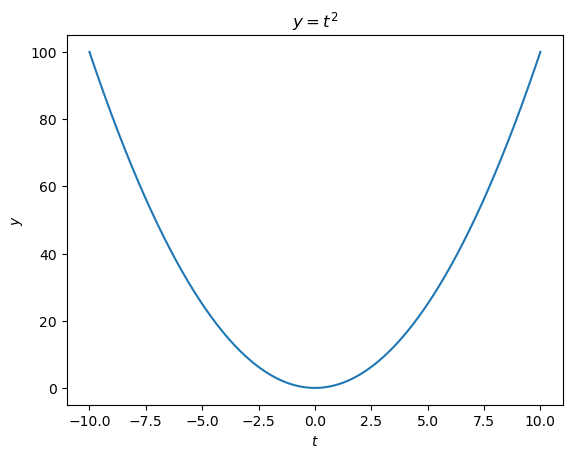

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)
y = t ** 2

plt.plot(t, y)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('$y = t^2$')
plt.show()

## Complex-Valued Signals

We'll often deal with complex numbers and complex-valued signals, i.e. $f: \mathbb{R} \to \mathbb{C}$. These are easy enough to represent using these libraries.

In [3]:
z1 = 1.0+2.0j
z2 = 3.0-4.0j

z1 + z2

(4-2j)

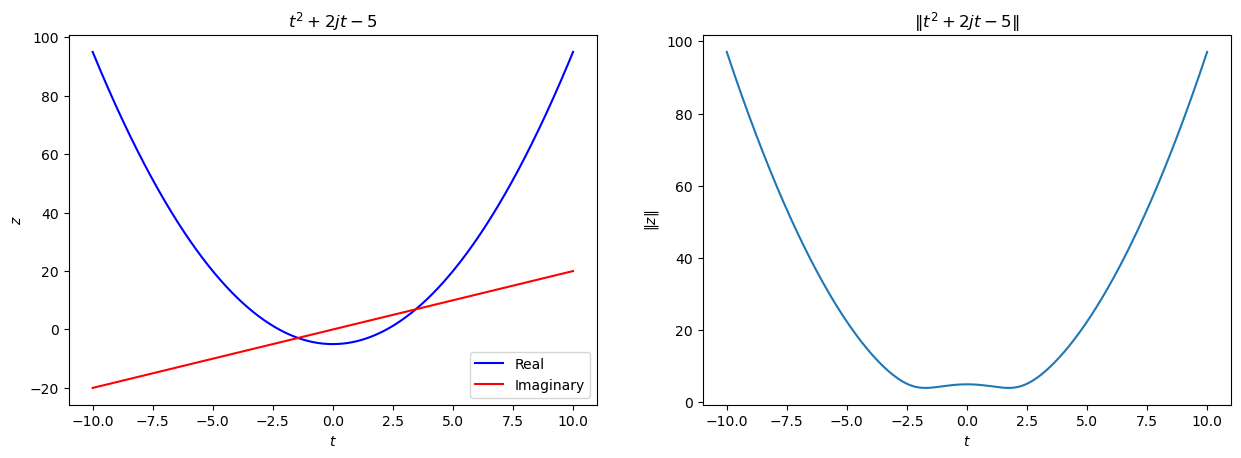

In [4]:
t = np.linspace(-10, 10, 1000)
z = t ** 2 + 2.0j * t - 5

plt.figure().set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(t, np.real(z), 'b')
plt.plot(t, np.imag(z), 'r')
plt.legend(['Real', 'Imaginary'])
plt.xlabel('$t$')
plt.ylabel('$z$')
plt.title('$t^2 + 2j t - 5$')

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(z))
plt.xlabel('$t$')
plt.ylabel('$\|z\|$')
plt.title('$\| t^2 + 2j t - 5 \|$')


plt.show()

## Sinusoids and Complex Representations

We'll be dealing with sinusoids a lot, i.e.

$$ y(t) = A \cos(\omega t + \phi)$$

We say $A$ is the amplitude, $\omega$ is the (angular) frequency, and $\phi$ is the phase offset. If you want to measure frequency in cycles/second (Hertz) instead of radians/second, you can convert to

$$ y(t) = A \cos(2 \pi f t + \phi)$$

Trig identities are hard and exponent rules are easy, so we'll often represent real sinusoids using complex exponentials.


### Euler's Formula

$$e^{j\theta} = \cos(\theta) + j \sin(\theta)$$

$$\cos(\theta) = Re(e^{j\theta}) = \frac{1}{2} \left(e^{j\theta} + e^{-j \theta} \right)$$

$$\sin(\theta) = Im(e^{j\theta}) = \frac{1}{2j} \left(e^{j\theta} - e^{-j \theta} \right)$$

Plugging in our real-valued sinusoid, we get

$$A \cos(\omega t + \phi) = Re\left( e^{j(\omega t + \phi)} \right)$$

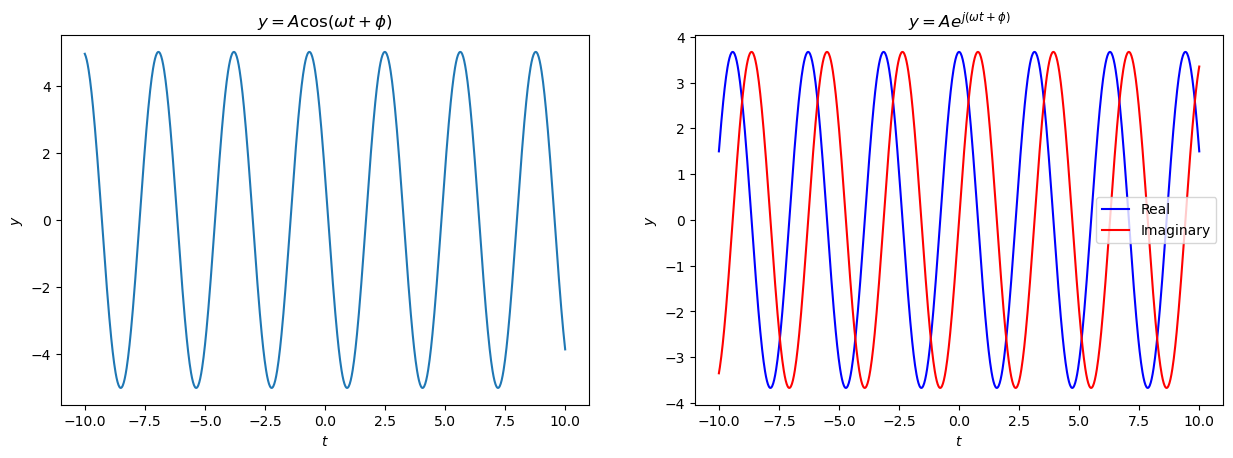

In [5]:
t = np.linspace(-10, 10, 1000)

A = 5.0
w = 2.0
phi = 1.3

y_real = A * np.cos(w * t + phi )
y_cmplx = np.exp(1.0j * w * t + phi)

plt.figure().set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(t, y_real)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('$y = A \cos(\omega t + \phi)$')

plt.subplot(1, 2, 2)
plt.plot(t, np.real(y_cmplx), 'b')
plt.plot(t, np.imag(y_cmplx), 'r')
plt.legend(['Real', 'Imaginary'])
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('$y = A e^{j(\omega t + \phi)}$')
plt.show()

In this representation of $A \cos(\omega t + \phi)$, the real and imaginary values are exactly $\frac{\pi}{2}$ apart in phase and otherwise equal in value. This representation has the abstract benefit that we can algebraically manipulate it using exponent rules instead of trig identities, but the real and imaginary sampled values contain the exact same, redundant information.

Later, in the context of phase modulation, we'll see that we can [use the imaginary component of a complex-valued signal to represent phase information by exploiting the angle sum identity](https://en.wikipedia.org/wiki/In-phase_and_quadrature_components#Orthogonality). But for now, we'll play fast and loose by using real-valued and complex-valued sinusoids interchangeably.